0 loss_value: 1.7152508
100 loss_value: 0.6712143
200 loss_value: 0.48860112
300 loss_value: 0.40068322
400 loss_value: 0.34329918
500 loss_value: 0.30053538
600 loss_value: 0.2664936
700 loss_value: 0.23837504
800 loss_value: 0.21460201
900 loss_value: 0.19417992
1000 loss_value: 0.17643309
1100 loss_value: 0.1608761
1200 loss_value: 0.14714529
1300 loss_value: 0.13495909
1400 loss_value: 0.12409342
1500 loss_value: 0.11436617
1600 loss_value: 0.10562706
1700 loss_value: 0.09775032
1800 loss_value: 0.090629704
1900 loss_value: 0.08417464
2000 loss_value: 0.07830751
2100 loss_value: 0.07296125
2200 loss_value: 0.068078086
2300 loss_value: 0.06360776
2400 loss_value: 0.059506536
2500 loss_value: 0.055735968
2600 loss_value: 0.05226269
2700 loss_value: 0.049057163
2800 loss_value: 0.046093423
2900 loss_value: 0.043348595
3000 loss_value: 0.040802345
3100 loss_value: 0.038436707
3200 loss_value: 0.03623568
3300 loss_value: 0.03418491
3400 loss_value: 0.0322717
3500 loss_value: 0.030484585

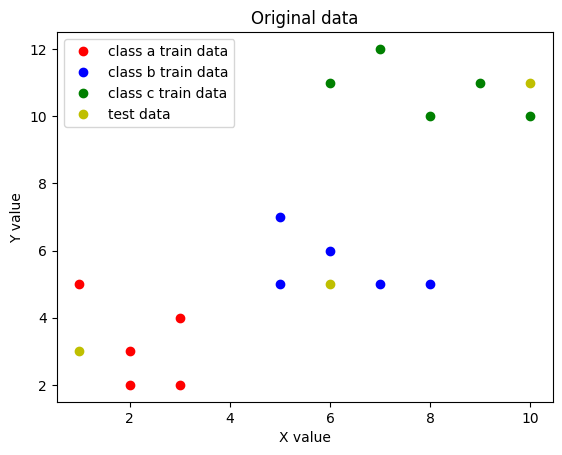

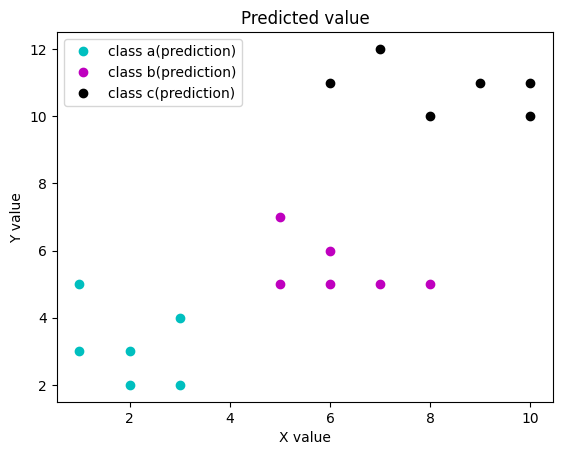

In [1]:
#using tensorlfow to implement softmax classfication to identify numerous class data
import tensorflow as tf
import numpy as np
#assigning weigh and bias variable
w = tf.Variable(tf.random.uniform([2,3]))
b = tf.Variable(tf.random.uniform([3]))
#data divided into three classes along a particular straight line from 2D data(class a=[1,0,0], class b=[0,1,0], class c=[0,0,1])
#input data
label_x=np.array([[3,2],[2,2],[2,3],[3,4],[1,5],[5,5],[5,7],[6,6],[7,5],[8,5],[6,11],[7,12],[8,10],[9,11],[10,10]],dtype=np.float32)
#output data
label_y=np.array([[1,0,0],[1,0,0],[1,0,0],[1,0,0],[1,0,0],[0,1,0],[0,1,0],[0,1,0],[0,1,0],[0,1,0],[0,0,1],[0,0,1],[0,0,1],[0,0,1],[0,0,1]],dtype=np.float32)
[57]
#loss function def
def loss_function():
#Derive the pred_y value with softmax function and derive the loss value with the state cross entry loss as the loss function
  z= tf.matmul(label_x,w)+b
  pred_y = tf.nn.softmax(z)
  cost = -tf.reduce_mean(tf.reduce_sum(label_y * tf.math.log(pred_y),axis=1))
  return cost
optimizer = tf.optimizers.Adam(learning_rate=0.01)
for step in range(10000): #train
    cost_val=optimizer.minimize(loss_function, var_list=[w,b])
    if step % 100 == 0:
        print(step,"loss_value:", loss_function().numpy())

pred_y = tf.nn.softmax(tf.matmul(label_x,w)+b)
argmax_y=tf.argmax(label_y,1) #argmax of label data
pred_final = tf.argmax(pred_y,1)#predicted argmax from the model from pred_y data
accuracy = tf.reduce_mean(tf.cast(tf.equal(pred_final,argmax_y),dtype=tf.float32)) #train_accuracy
print("accuracy:", accuracy.numpy())

#setting test data and predicting with training model
test_x=np.array([[1,3],[6,5],[10,11]],dtype=np.float32)
test_y=np.array([[1,0,0],[0,1,0],[0,0,1]],dtype=np.float32)

test_pred= tf.nn.softmax(tf.matmul(test_x,w)+b)
test_argmax_y=tf.argmax(test_y,1)
test_pred_final= tf.argmax(test_pred,1)
test_accuracy = tf.reduce_mean(tf.cast(tf.equal(test_pred_final,test_argmax_y),dtype=tf.float32)) #test_accuracy
print("accuracy:", test_accuracy.numpy())

import matplotlib.pyplot as plt
test_pred_final=np.array(test_pred_final)
pred_final=np.array(pred_final)
argmax_y=np.array(argmax_y)
label_x_x1=label_x[:,0]
label_x_y1=label_x[:,1]

test_x_x1=test_x[:,0]
test_x_y1=test_x[:,1]

#Separate data according to class a ([1,0,0]), b ([0,1,0]), c ([0,0,1]) for visualization, and plot the results
label_x_x1_0=label_x_x1[argmax_y==0]
label_x_x1_1=label_x_x1[argmax_y==1]
label_x_x1_2=label_x_x1[argmax_y==2]
label_x_y1_0=label_x_y1[argmax_y==0]
label_x_y1_1=label_x_y1[argmax_y==1]
label_x_y1_2=label_x_y1[argmax_y==2]
# original data plot
plt.figure()
plt.title("Original data")
plt.xlabel("X value")
plt.ylabel("Y value")
plt.plot(label_x_x1_0, label_x_y1_0, 'ro', label='class a train data')
plt.plot(label_x_x1_1, label_x_y1_1,'bo', label='class b train data')
plt.plot(label_x_x1_2, label_x_y1_2,'go', label='class c train data')
plt.plot(test_x_x1, test_x_y1,'yo', label='test data')
plt.legend()
plt.show()

pred_x_x1_0=label_x_x1[pred_final==0]
pred_x_x1_1=label_x_x1[pred_final==1]
pred_x_x1_2=label_x_x1[pred_final==2]
pred_x_y1_0=label_x_y1[pred_final==0]
pred_x_y1_1=label_x_y1[pred_final==1]
pred_x_y1_2=label_x_y1[pred_final==2]

pred_test_x_x1_0=test_x_x1[test_pred_final==0]
pred_test_x_x1_1=test_x_x1[test_pred_final==1]
pred_test_x_x1_2=test_x_x1[test_pred_final==2]
pred_test_x_y1_0=test_x_y1[test_pred_final==0]
pred_test_x_y1_1=test_x_y1[test_pred_final==1]
pred_test_x_y1_2=test_x_y1[test_pred_final==2]

# preidicted value plot
plt.figure()
plt.title("Predicted value")
plt.xlabel("X value")
plt.ylabel("Y value")
plt.plot(pred_x_x1_0, pred_x_y1_0, 'co', label='class a(prediction)')
plt.plot(pred_x_x1_1, pred_x_y1_1,'mo', label='class b(prediction)')
plt.plot(pred_x_x1_2, pred_x_y1_2,'ko', label='class c(prediction)')
plt.plot(pred_test_x_x1_0, pred_test_x_y1_0,'co')
plt.plot(pred_test_x_x1_1, pred_test_x_y1_1,'mo')
plt.plot(pred_test_x_x1_2, pred_test_x_y1_2,'ko')
plt.legend()
plt.show()